In [1]:
import pandas as pd
from geopy.distance import geodesic

# Load the data
df = pd.read_csv('/content/USA_airports .csv')

# Filter the data for a specific state
df_state = df[df['state'] == 'CA']

# Calculate the distance matrix using geodesic
dist_matrix = [[geodesic((row1['lat'], row1['long']), (row2['lat'], row2['long'])).miles
                for _, row2 in df_state.iterrows()]
               for _, row1 in df_state.iterrows()]

# Convert the distance matrix to a DataFrame
dist_matrix = pd.DataFrame(dist_matrix, index=df_state['iata'], columns=df_state['iata'])


The path is starting at the airport: L71


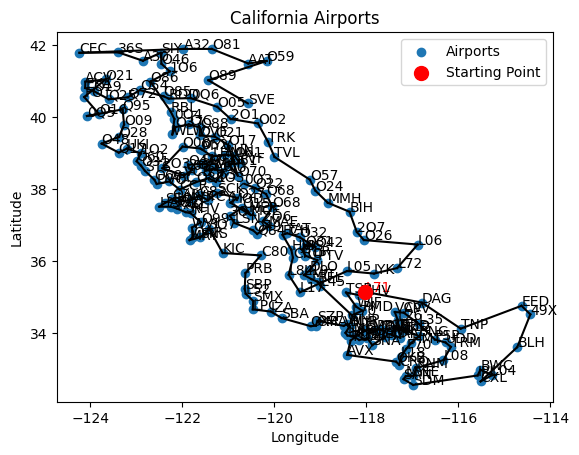

The total distance of the path is: 4742.541752761162 miles
Nearest neighbor algorithm took 1.6822755336761475 seconds.


In [2]:
import matplotlib.pyplot as plt
import random
import time

start_time = time.time()
# Implement the nearest neighbor algorithm
path = [df_state['iata'].iloc[0]]
total_distance = 0
while len(path) < len(df_state):
    last_airport = path[-1]
    next_airport = dist_matrix[last_airport].drop(path).idxmin()
    if next_airport in df_state['iata'].values:  # Ensure the next airport is in df_state
        path.append(next_airport)
        total_distance += dist_matrix[last_airport][next_airport]

# Plot the path
fig, ax = plt.subplots()
ax.scatter(df_state['long'], df_state['lat'], label='Airports')

# Select a random starting point and highlight it
random_start = random.choice(df_state['iata'].tolist())
start_coords = df_state[df_state['iata'] == random_start][['long', 'lat']].values[0]
ax.scatter(start_coords[0], start_coords[1], color='red', s=100, zorder=5, label='Starting Point')

# Print the starting airport
print(f"The path is starting at the airport: {random_start}")

# Add the airport names and highlight the name of the starting airport
for _, row in df_state.iterrows():
    ax.text(row['long'], row['lat'], row['iata'], color='red' if row['iata'] == random_start else 'black')

# Draw lines between the airports
for i in range(len(path)-1):
    start = df_state[df_state['iata'] == path[i]][['long', 'lat']].values[0]
    end = df_state[df_state['iata'] == path[i+1]][['long', 'lat']].values[0]
    ax.plot([start[0], end[0]], [start[1], end[1]], 'k-')

# Set the title and labels
ax.set_title('California Airports')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()
print(f"The total distance of the path is: {total_distance} miles")

end_time = time.time()

print("Nearest neighbor algorithm took", end_time - start_time, "seconds.")


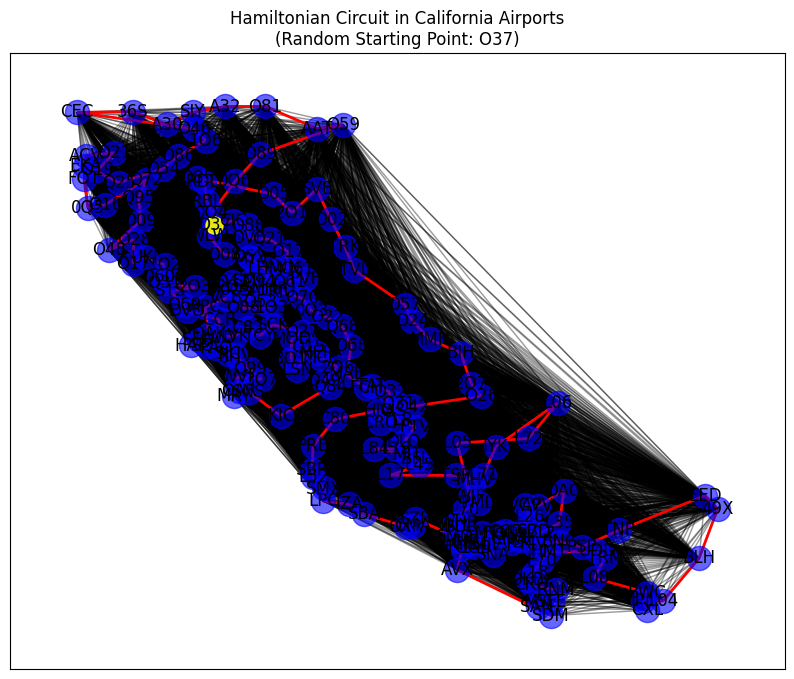

The total distance of the path is: 4853.097921941653 miles
The Hamiltonian path is:
0O3, O70, RIU, O61, PVF, Q61, AUN, O17, Q21, OVE, Q88, CIC, O37, WLW, O08, O52, MYV, LHM, MHR, SAC, Q53, 1O3, O88, Q94, SMF, O41, 2Q3, 0O5, VCB, APC, OAK, SFO, HAF, SQL, PAO, SJC, RHV, Q99, 3O7, WVI, OAR, MRY, SNS, KIC, Q84, Q49, 2O6, MCE, MER, O15, LSN, 3O1, MOD, O27, SCK, TCY, C83, LVK, HWD, CCR, DVO, O69, STS, 2O3, O31, O60, 1O2, UKI, Q17, O28, O48, O09, Q95, Q72, O16, 0Q5, FOT, O19, O21, ACV, EKA, Q25, O54, O86, 1O6, O46, CEC, 36S, A30, SIY, A32, O81, AAT, O59, O89, 0Q6, 0O4, RBL, RDD, O85, O05, 2O1, SVE, O02, TRK, TVL, O57, O24, MMH, BIH, 2O7, O26, O42, Q31, VIS, TLR, PTV, DLO, L19, L84, MIT, BFL, L45, L17, TSP, MHV, L71, IYK, L06, L72, L05, WJF, PMD, L70, WHP, VNY, BUR, CPM, TOA, AVX, SDM, SAN, MYF, SEE, RNM, CRQ, OKB, L18, F70, HMT, UDD, TRM, L08, BWC, CXL, IPL, L04, BLH, 49X, EED, TNP, PSP, BNG, RIV, RAL, L67, SBD, L12, L35, DAG, APV, VCV, L26, AJO, CNO, ONT, CCB, POC, EMT, FUL, SNA, LGB, HHR, L

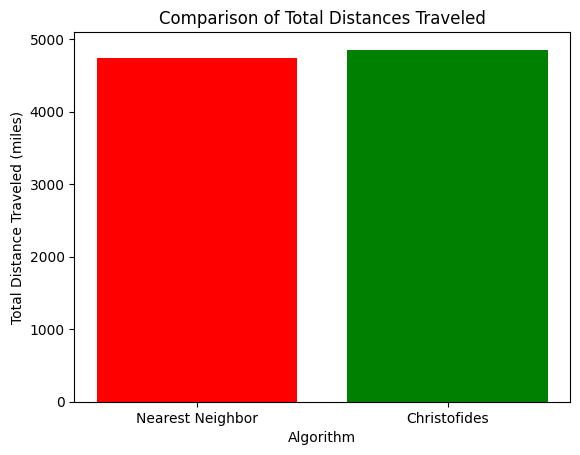

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import random

start_time = time.time()
# Create a graph from the distance matrix
# Correcting the code to use the right DataFrame name for the distance matrix
# The correct DataFrame is dist_matrix_df which was created earlier
dist_matrix_df = pd.DataFrame(dist_matrix, index=df_state['iata'], columns=df_state['iata'])
# Re-create the graph from the distance matrix using the correct DataFrame name
G_corrected = nx.Graph()
for i in df_state['iata']:
    for j in df_state['iata']:
        if i != j:
            G_corrected.add_edge(i, j, weight=dist_matrix_df.at[i, j])


# Step 1: Create a Minimum Spanning Tree (MST) using the corrected graph
mst_corrected = nx.minimum_spanning_tree(G_corrected)

# Step 2: Find Vertices with Odd Degree in the corrected MST
odd_degree_nodes_corrected = [v for v, d in mst_corrected.degree() if d % 2 == 1]

# Step 3: Minimum Weight Perfect Matching in the corrected graph
odd_graph_corrected = G_corrected.subgraph(odd_degree_nodes_corrected)
mwpm_corrected = nx.algorithms.matching.min_weight_matching(odd_graph_corrected)

# Combine the edges of MST and MWPM to form a MultiGraph which will have an Eulerian Circuit
multi_graph_corrected = nx.MultiGraph(mst_corrected)
multi_graph_corrected.add_edges_from(mwpm_corrected)

# Find an Eulerian circuit in the corrected graph
eulerian_circuit_corrected = list(nx.eulerian_circuit(multi_graph_corrected))

# Convert Eulerian to Hamiltonian path in the corrected graph
hamiltonian_path_corrected = []
visited_corrected = set()
for u, v in eulerian_circuit_corrected:
    if u not in visited_corrected:
        hamiltonian_path_corrected.append(u)
        visited_corrected.add(u)
    if v not in visited_corrected:
        hamiltonian_path_corrected.append(v)
        visited_corrected.add(v)

random_start = random.choice(hamiltonian_path_corrected)

pos = {airport: (df_state.loc[df_state['iata'] == airport, 'long'].values[0],
                 df_state.loc[df_state['iata'] == airport, 'lat'].values[0])
       for airport in df_state['iata']}

# Let's pick a random starting point (airport) from the Hamiltonian path
random_start = random.choice(hamiltonian_path_corrected)

# Now we will plot the graph, highlighting the random starting point in a different color
# First, we extract the position for the random starting point
random_start_pos = pos[random_start]

# Plotting the corrected graph
plt.figure(figsize=(10, 8))
# Draw all nodes and labels
nx.draw_networkx_nodes(G_corrected, pos, node_color='blue', alpha=0.6)
nx.draw_networkx_labels(G_corrected, pos)
# Draw all edges
nx.draw_networkx_edges(G_corrected, pos, alpha=0.4)
# Highlight the Hamiltonian path
path_edges_corrected = list(zip(hamiltonian_path_corrected, hamiltonian_path_corrected[1:] + [hamiltonian_path_corrected[0]]))
nx.draw_networkx_edges(G_corrected, pos, edgelist=path_edges_corrected, edge_color='r', width=2)
# Highlight the random starting point in a different color (e.g., green)
nx.draw_networkx_nodes(G_corrected, pos, nodelist=[random_start], node_color='yellow', alpha=0.9, node_size=150)
plt.title(f"Hamiltonian Circuit in California Airports\n(Random Starting Point: {random_start})")
plt.show()

# Show the random starting point
random_start

# Calculate the total distance for the corrected path
total_distance_corrected = sum(dist_matrix_df.at[u, v] for u, v in path_edges_corrected)

# Corrected print statement for the total distance and the Hamiltonian path
print(f"The total distance of the path is: {total_distance_corrected} miles")
print("The Hamiltonian path is:")
print(', '.join(hamiltonian_path_corrected))

end_time = time.time()

print("Christofides' Algorithm took", end_time - start_time, "seconds.")


import matplotlib.pyplot as plt

# The total distances traveled by the Nearest Neighbor and Christofides' algorithms
distances = [total_distance, total_distance_corrected]

# The names of the algorithms
algorithms = ['Nearest Neighbor', 'Christofides']

# Create a bar graph
plt.bar(algorithms, distances, color=['red', 'green'])

# Add a title and labels to the axes
plt.title('Comparison of Total Distances Traveled')
plt.xlabel('Algorithm')
plt.ylabel('Total Distance Traveled (miles)')

# Display the graph
plt.show()



Nearest Neighbor Algorithm (Symmetric) took 0.35771870613098145 seconds.
[0, 2602, 2329, 56, 1503, 21, 844, 433, 2171, 1323, 546, 2787, 2621, 2711, 1635, 1579, 1368, 1286, 946, 682, 2624, 1784, 139, 1268, 2830, 2391, 2310, 355, 418, 2549, 524, 2123, 272, 706, 1765, 1931, 1357, 1274, 366, 2842, 2848, 194, 2860, 423, 2190, 46, 1307, 1716, 2802, 2578, 341, 1908, 283, 1963, 530, 2633, 259, 534, 449, 2814, 1031, 2959, 1988, 425, 1907, 187, 2029, 1009, 1232, 1201, 1278, 749, 1223, 635, 924, 287, 1751, 2658, 2905, 1551, 2536, 580, 1891, 2509, 645, 2571, 653, 1243, 2042, 2659, 502, 995, 1083, 2868, 1852, 2470, 1664, 2550, 599, 1608, 1874, 701, 2494, 851, 134, 1910, 324, 1203, 2150, 1303, 1416, 2098, 1884, 733, 2952, 1668, 963, 2360, 841, 1496, 1986, 457, 828, 2577, 859, 2805, 1552, 1389, 672, 367, 1382, 615, 1933, 1750, 967, 321, 1920, 668, 1122, 1956, 1490, 1835, 1217, 810, 1839, 1677, 402, 829, 1212, 1220, 159, 2574, 1239, 90, 1939, 1974, 2223, 219, 504, 988, 562, 1097, 2237, 846, 337, 960, 

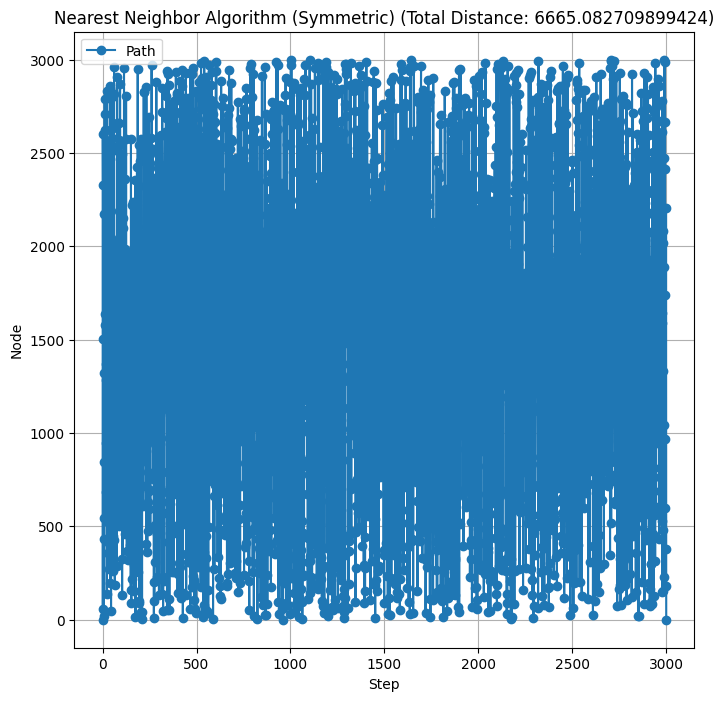

Nearest Neighbor Algorithm (Asymmetric) took 0.29007434844970703 seconds.
[0, 158, 951, 2382, 1402, 40, 2958, 2800, 2066, 557, 665, 1996, 200, 1547, 523, 1743, 2783, 667, 405, 692, 810, 199, 2601, 2095, 2924, 2339, 34, 55, 2438, 1934, 1534, 2565, 1948, 1725, 2682, 2105, 1363, 2378, 2786, 1267, 1648, 1467, 2502, 58, 2459, 1565, 1784, 1878, 2005, 2305, 1374, 1831, 726, 2837, 2801, 849, 1338, 2890, 2501, 2484, 326, 743, 2190, 1739, 2476, 506, 1672, 2971, 1952, 503, 846, 2368, 2759, 1383, 265, 830, 637, 2369, 2710, 1001, 775, 2303, 1417, 1376, 2361, 2779, 1528, 1777, 1225, 1411, 1228, 487, 1395, 16, 454, 1933, 2194, 1033, 2449, 2918, 77, 1102, 70, 2929, 1431, 2935, 2897, 843, 745, 367, 2824, 928, 327, 1196, 2247, 1844, 2620, 1066, 1138, 161, 2235, 1657, 1972, 2259, 833, 1010, 2411, 1664, 1931, 886, 230, 1073, 2264, 941, 2798, 955, 2904, 1130, 2042, 187, 2227, 304, 1827, 2016, 903, 1600, 281, 2319, 469, 1806, 1568, 2803, 1617, 1106, 307, 2711, 2442, 2216, 1874, 2082, 1925, 1669, 39, 2075, 1

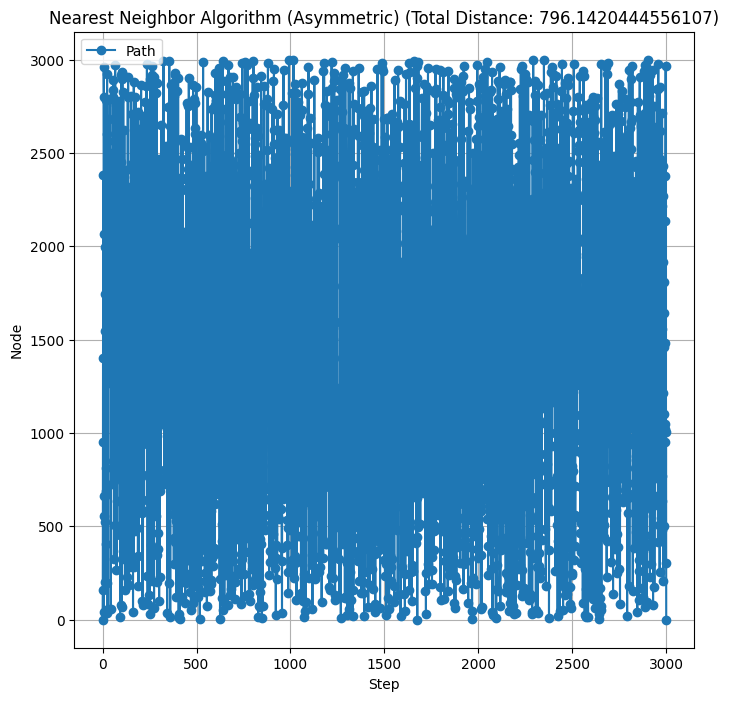

Christofides' Algorithm (Symmentric Points) took 4.847789764404297 seconds.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206

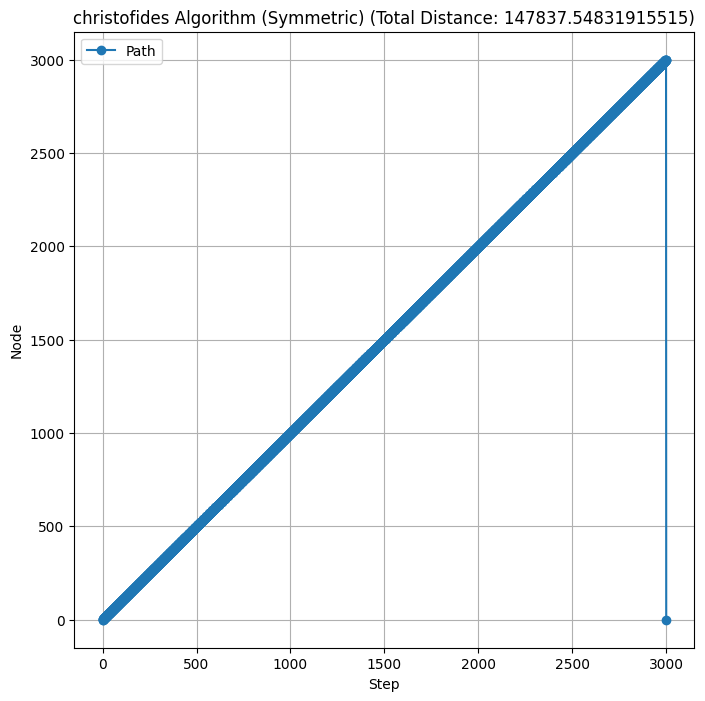

Christofides' Algorithm (Asymmetric) took 3.2005653381347656 seconds.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,

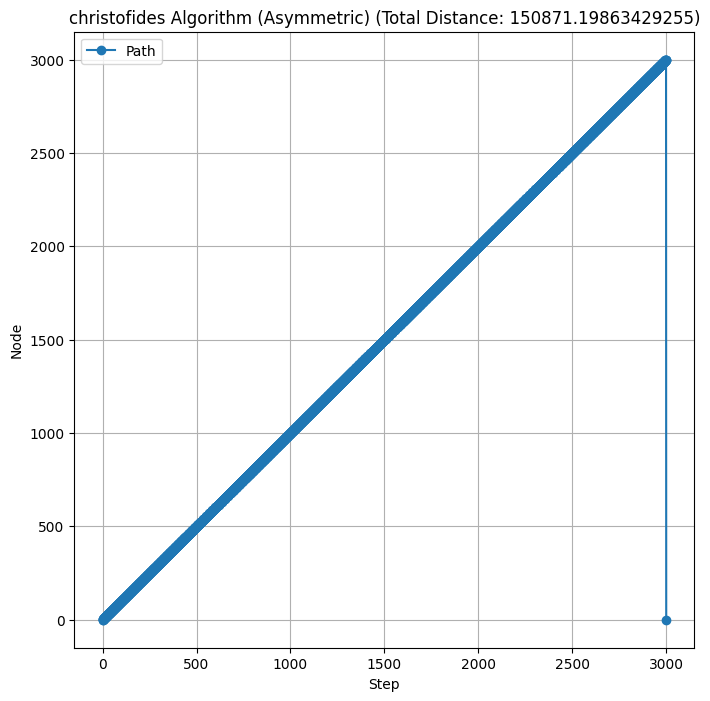

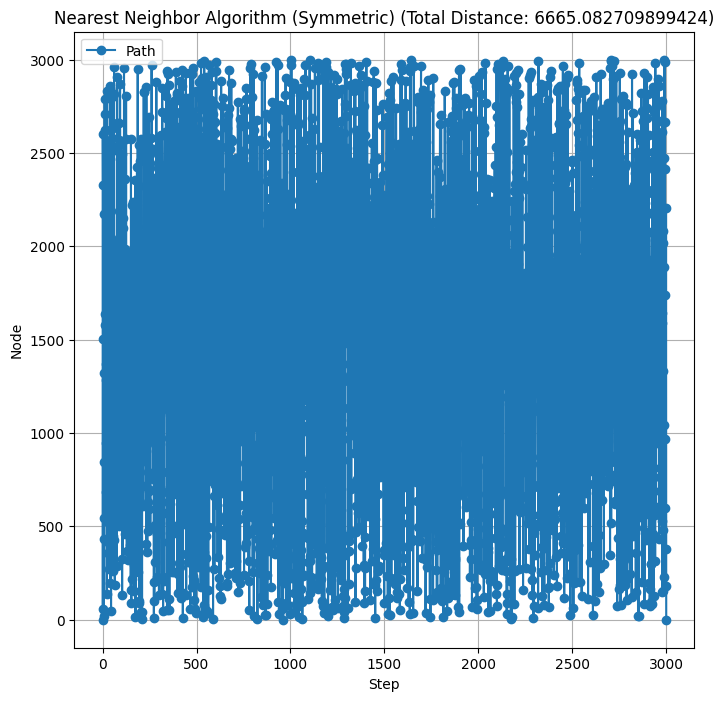

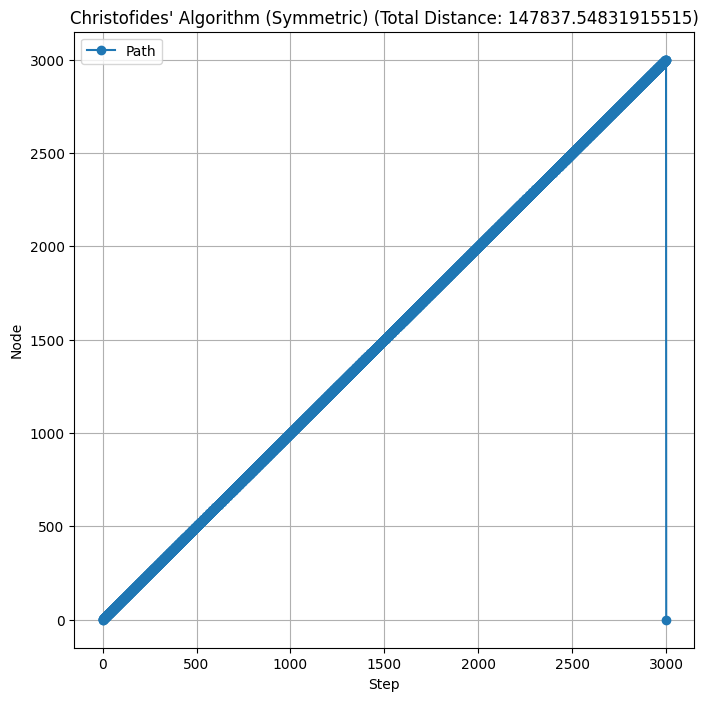

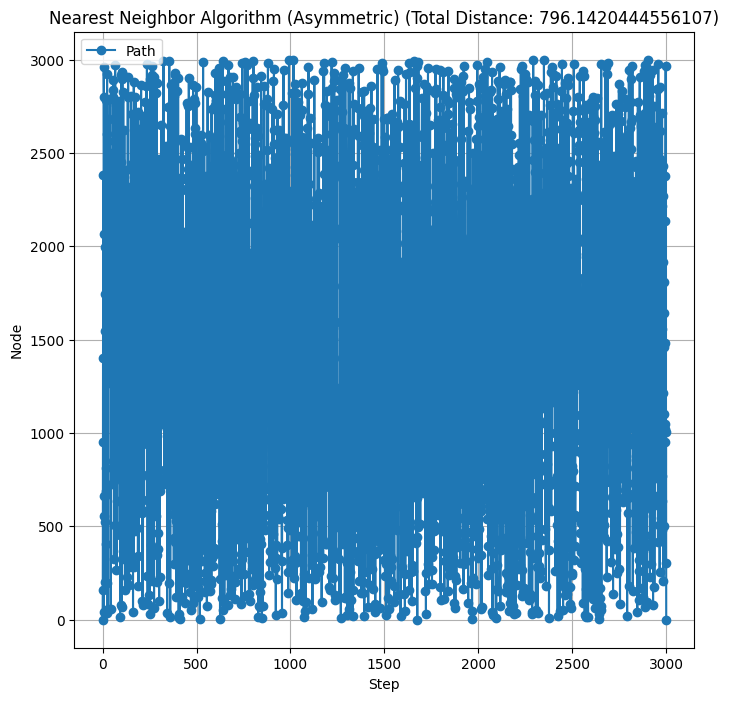

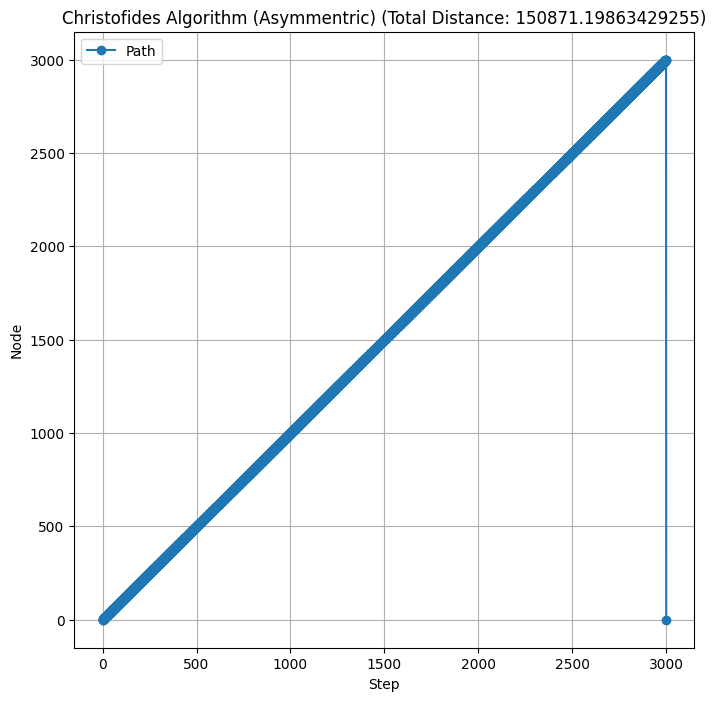

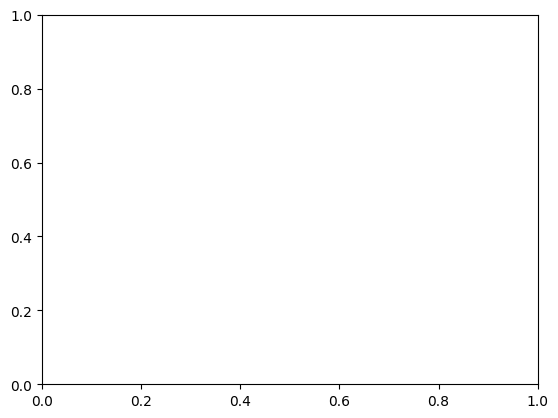

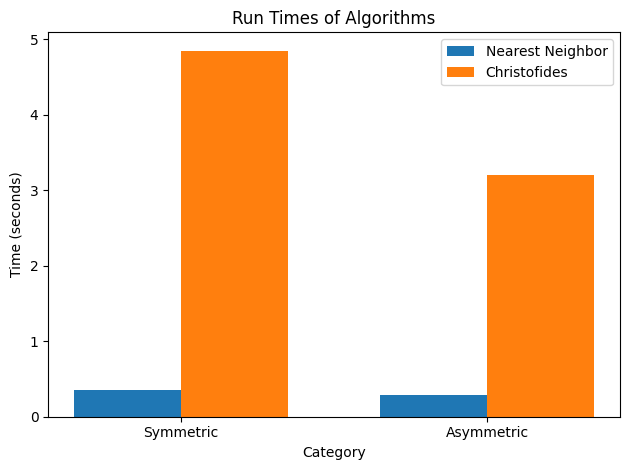

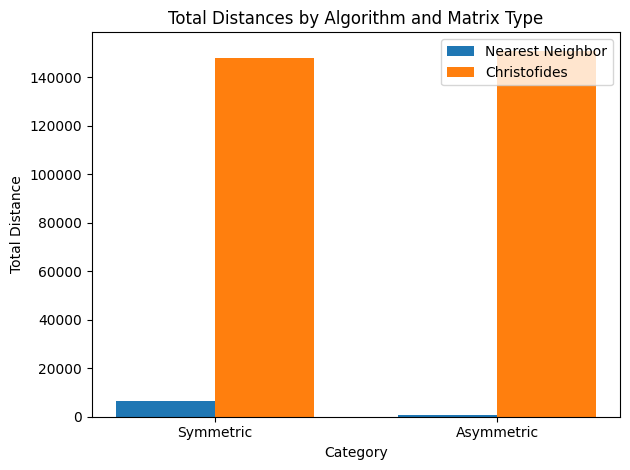

In [4]:
import numpy as np
from scipy.spatial.distance import squareform,pdist
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import time


def generate_symmetric_matrix(size):
    """Generate a symmetric distance matrix."""
    matrix = np.random.rand(size, size) * 100  # Generate random distances
    matrix = (matrix + matrix.T) / 2  # Make it symmetric
    np.fill_diagonal(matrix, 0)  # Distance to self is 0
    return matrix

def generate_asymmetric_matrix(size):
    """Generate an asymmetric distance matrix."""
    matrix_upper = np.triu(np.random.rand(size, size) * 100, 1)  # Upper triangle random distances
    matrix_lower = np.tril(np.random.rand(size, size) * 100, -1)  # Lower triangle random distances
    matrix = matrix_upper + matrix_lower  # Combine upper and lower to form full matrix
    np.fill_diagonal(matrix, 0)  # Distance to self is 0 # Generate random distances
    #np.fill_diagonal(matrix, 0)  # Distance to self is 0
    return matrix



def nearest_neighbor_algorithm(distances):
    """Implement the Nearest Neighbor algorithm for TSP."""
    num_points = len(distances)
    visited = np.zeros(num_points, dtype=bool)
    path = []
    total_distance = 0
    current_point = 0

    while len(path) < num_points:
        visited[current_point] = True
        path.append(current_point)
        next_distances = np.copy(distances[current_point])
        next_distances[visited] = np.inf
        next_point = np.argmin(next_distances)
        total_distance += distances[current_point, next_point]
        current_point = next_point

    # Return to the start point
    total_distance += distances[current_point, path[0]]
    path.append(path[0])
    return path, total_distance

def christofides_algorithm(distances):
    """Implement Christofides' algorithm for TSP."""
    # Step 1: Create a minimum spanning tree
    MSTree = minimum_spanning_tree(distances).toarray()
    odd_degree_nodes = np.sum(MSTree != 0, axis=1) % 2 == 1
    odd_node_indices = np.where(odd_degree_nodes)[0]

    # Step 2: Find a minimum weight perfect matching
    subgraph = distances[np.ix_(odd_node_indices, odd_node_indices)]
    row_ind, col_ind = linear_sum_assignment(subgraph)
    for i, j in zip(row_ind, col_ind):
        MSTree[odd_node_indices[i], odd_node_indices[j]] = subgraph[i, j]
        MSTree[odd_node_indices[j], odd_node_indices[i]] = subgraph[i, j]

    # Step 3: Combine edges and form a multigraph
    # This step is implicit as MSTree now represents the combined edges

    # Step 4: Form a Hamiltonian circuit (Eulerian circuit + shortcutting)
    num_points = len(distances)
    visited = np.zeros(num_points, dtype=bool)
    path = [0]
    visited[0] = True #Mark the start node as visited
    total_distance = 0

    while len(path) < num_points:
        current_point = path[-1]
        next_distances = np.copy(MSTree[current_point])
        next_distances[visited] = np.inf
        next_point = np.argmin(next_distances)
        if next_distances[next_point] != np.inf:
            MSTree[current_point, next_point] = 0
            MSTree[next_point, current_point] = 0
            total_distance += distances[current_point, next_point]
            visited[next_point] = True
            path.append(next_point)

    # Return to the start point
    total_distance += distances[current_point, path[0]]
    # total_distance += distances[path[-1], path[0]]
    path.append(path[0])
    return path, total_distance

# Generate matrices
size = 3000
symmetric_matrix = generate_symmetric_matrix(size)
asymmetric_matrix = generate_asymmetric_matrix(size)


def plot_path(path, total_distance, title):
    plt.figure(figsize=(8, 8))
    # Assuming 'path' is a list of node indices, including the return to the start.
    plt.plot(path, 'o-', label='Path')  # Plot the path.
    plt.title(f"{title} (Total Distance: {total_distance})")
    plt.xlabel('Step')
    plt.ylabel('Node')
    plt.legend()
    plt.grid(True)
    plt.show()

# Apply Nearest Neighbor Algorithm
start_time = time.time()
nn_path_sym, nn_distance_sym = nearest_neighbor_algorithm(symmetric_matrix)
end_time = time.time()
nn_time_sym = end_time - start_time
print("Nearest Neighbor Algorithm (Symmetric) took", end_time - start_time, "seconds.")
print(nn_path_sym)
plot_path(nn_path_sym, nn_distance_sym, 'Nearest Neighbor Algorithm (Symmetric)')


start_time = time.time()
nn_path_asym, nn_distance_asym = nearest_neighbor_algorithm(asymmetric_matrix)
end_time = time.time()
nn_time_asym = end_time - start_time
print("Nearest Neighbor Algorithm (Asymmetric) took", end_time - start_time, "seconds.")
print(nn_path_asym)
plot_path(nn_path_asym, nn_distance_asym, 'Nearest Neighbor Algorithm (Asymmetric)')

# Apply Christofides' Algorithm
start_time = time.time()
ch_path_sym, ch_distance_sym = christofides_algorithm(symmetric_matrix)
end_time = time.time()
ch_time_sym = end_time - start_time
print("Christofides' Algorithm (Symmentric Points) took", end_time - start_time, "seconds.")
print(ch_path_sym)
plot_path(ch_path_sym, ch_distance_sym, 'christofides Algorithm (Symmetric)')


# Apply Christofides' Algorithm
start_time = time.time()
ch_path_asym, ch_distance_asym = christofides_algorithm(asymmetric_matrix)
end_time = time.time()
ch_time_asym = end_time - start_time
print("Christofides' Algorithm (Asymmetric) took", end_time - start_time, "seconds.")
print(ch_path_asym)
plot_path(ch_path_asym, ch_distance_asym, 'christofides Algorithm (Asymmetric)')

(nn_path_sym, nn_distance_sym), (ch_path_sym, ch_distance_sym), (nn_path_asym, nn_distance_asym), (ch_path_asym, ch_distance_asym)

def plot_path(path, total_distance, title):
    plt.figure(figsize=(8, 8))
    # Assuming 'path' is a list of node indices, including the return to the start.
    plt.plot(path, 'o-', label='Path')  # Plot the path.
    plt.title(f"{title} (Total Distance: {total_distance})")
    plt.xlabel('Step')
    plt.ylabel('Node')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_algorithm_distances(nn_distances, ch_distances):
    categories = ['Nearest Neighbor', "Christofides'"]

    # Assuming nn_distances and ch_distances are structured as:
    # [symmetric distance, asymmetric distance]
    distances_sym = [nn_distances[0], ch_distances[0]]  # Symmetric
    distances_asym = [nn_distances[1], ch_distances[1]]  # Asymmetric


# Plot paths
plot_path(nn_path_sym, nn_distance_sym, 'Nearest Neighbor Algorithm (Symmetric)')
plot_path(ch_path_sym, ch_distance_sym, "Christofides' Algorithm (Symmetric)")
plot_path(nn_path_asym, nn_distance_asym, 'Nearest Neighbor Algorithm (Asymmetric)')
plot_path(ch_path_asym, ch_distance_asym, "Christofides Algorithm (Asymmentric)")

# Store the run times and distances in lists
categories = ['Symmetric', 'Asymmetric']
nn_run_times = [nn_time_sym , nn_time_asym]  # replace with actual run times
ch_run_times = [ch_time_sym, ch_time_asym]  # replace with actual run times

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot run times
bar_width = 0.35
index = np.arange(len(categories))

bar1 = ax.bar(index, nn_run_times, bar_width, label='Nearest Neighbor')
bar2 = ax.bar(index + bar_width, ch_run_times, bar_width, label='Christofides')

ax.set_xlabel('Category')
ax.set_ylabel('Time (seconds)')
ax.set_title('Run Times of Algorithms')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Store the distances in lists
nn_distances = [nn_distance_sym, nn_distance_asym]  # Nearest Neighbor distances
ch_distances = [ch_distance_sym, ch_distance_asym]  # Christofides' distances

# Create a new figure and a set of subplots for the distances
fig, ax = plt.subplots()

# Plot distances
bar_width = 0.35
index = np.arange(len(categories))

bar1 = ax.bar(index, nn_distances, bar_width, label='Nearest Neighbor')
bar2 = ax.bar(index + bar_width, ch_distances, bar_width, label='Christofides')

ax.set_xlabel('Category')
ax.set_ylabel('Total Distance')
ax.set_title('Total Distances by Algorithm and Matrix Type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
